In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL(No Est).csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.474178,0.033486,0.505572,0.134906,0.140229,0.511154,0.206589,0.035591,...,1.0,1.0,0.956897,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.382779,0.034902,0.524968,0.165479,0.169241,0.483212,0.206589,0.078971,...,1.0,1.0,0.965517,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.396536,0.036982,0.510508,0.184951,0.191848,0.520425,0.206589,0.113087,...,1.0,1.0,0.974138,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.500240,0.037556,0.518623,0.217342,0.214736,0.401164,0.206589,0.113190,...,1.0,1.0,0.982759,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.626534,0.039688,0.564300,0.256425,0.242148,0.284666,0.206589,0.088505,...,1.0,1.0,0.991379,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [3]:
# Read Data
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

In [4]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/home/pogo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
param_grid = {
    # 'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'hidden_layer_sizes':[(34,68,34)],
    'activation': ['identity'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['invscaling'],
    'learning_rate_init': [0,0.0001,0.0005,0.001, 0.005,0.01],
    'max_iter': [5000],
}

gridSearch = GridSearchCV(MLPClassifier(random_state=1), param_grid,
                          cv=5,
                          scoring='recall',
                          refit='recall',
                          verbose=1)
gridSearch.fit(X_train, y_train)
y_pred = gridSearch.predict(X_test)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Score:  0.53
Parameters:  {'activation': 'identity', 'alpha': 0, 'hidden_layer_sizes': (34, 68, 34), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0005, 'max_iter': 5000, 'solver': 'adam'}


Confusion Matrix:
 [[33  0]
 [ 2  4]]
Accuracy:         0.9487179487179487
Recall Score:     0.6666666666666666
Precision Score:  1.0
F1 Score:         0.8
ROC_AUC Score:    0.8333333333333333


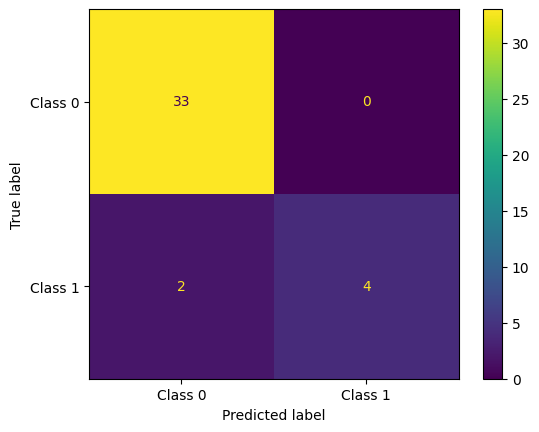

In [7]:
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:        ", accuracy_score(y_test, y_pred))
print("Recall Score:    ", recall_score(y_test, y_pred, zero_division=1))     
print("Precision Score: ",precision_score(y_test, y_pred, zero_division=1))
print("F1 Score:        ", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,y_pred,multi_class='ovr'))



cm = confusion_matrix(y_test, y_pred)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


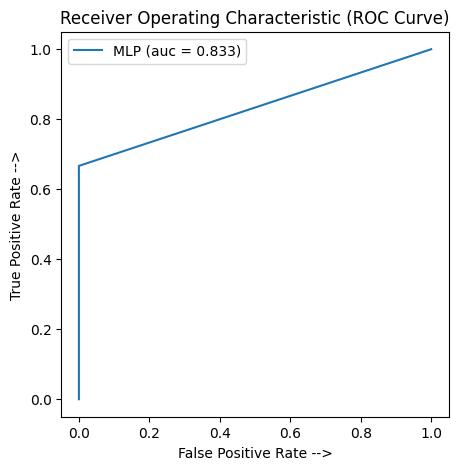

In [8]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='MLP (auc = %0.3f)' % auc)
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

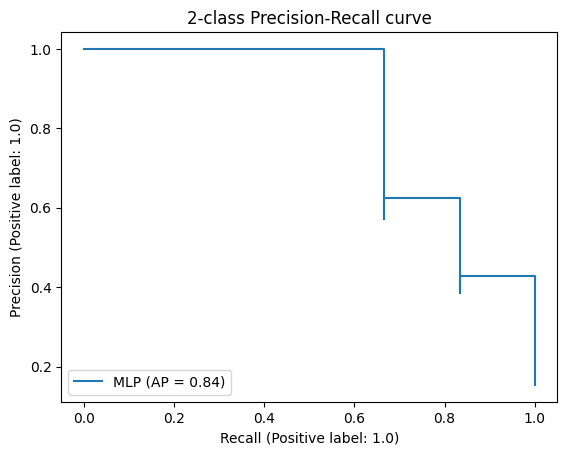

In [9]:
#AP = Average precision
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gridSearch, X_test, y_test, name="MLP"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")